In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import seaborn as sns

%matplotlib inline

In [2]:
philly_points = pd.read_csv('data/city/Vacant_Indicators_Points.csv')
philly_points.head()
#https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/59c154f1c8357d22ed035e66/

,X,Y,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_FLAG,VACANT_RANK
0,-75.178904,39.934505,1,2041 REED ST,GREATER DELIVERANCE TEMPL,NaN,VAC LAND COMM. < ACRE,885396760.0,498086,2,CMX-2,19146.0,0.67,0.0,Land,0.67
1,-75.164548,39.988160,2,2233 N UBER ST,CITY OF PHILA,NaN,VAC LAND RES < ACRE,162113701.0,581713,5,RSA-5,19132.0,0.50,0.0,Land,0.50
2,-75.180480,39.978561,3,1460 N MARSTON ST,PHILADELPHIA HOUSING AUTH,NaN,VAC LAND RES < ACRE,292083110.0,415511,5,RSA-5,19121.0,0.50,0.0,Land,0.50
3,-75.186579,40.006852,4,3241 SUGDENS ROW,JORDAN MARIA,NaN,VAC LAND RES < ACRE,382209500.0,557317,4,RSA-5,19129.0,1.00,0.0,Land,1.00
4,-75.238794,39.954902,5,5816 PINE ST,WALSH JAMES,LUBLIN WILLIAM H,ROW 2 STY MASONRY,604178400.0,485528,3,RM-1,19143.0,0.00,1.0,Building,1.00


In [3]:
philly_points.describe()

,X,Y,OBJECTID,OPA_ID,COUNCILDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_RANK
count,36917.000000,36917.000000,36917.00000,3.689600e+04,36917.000000,36595.000000,36915.000000,36917.000000,36915.000000
mean,-75.167337,39.985244,18459.00000,3.431197e+08,4.913211,19131.573330,0.525169,0.150244,0.665391
std,0.041322,0.031944,10657.16428,2.276140e+08,2.175462,11.154188,0.343984,0.252557,0.184587
min,-75.269183,39.883301,1.00000,1.100490e+07,1.000000,19102.000000,0.000000,0.000000,0.500000
25%,-75.189216,39.968623,9230.00000,1.831285e+08,3.000000,19122.000000,0.415000,0.000000,0.500000
50%,-75.165435,39.986638,18459.00000,3.110167e+08,5.000000,19133.000000,0.500000,0.000000,0.670000
75%,-75.144508,39.999227,27688.00000,4.320889e+08,7.000000,19140.000000,0.670000,0.500000,0.670000
max,-74.964149,40.135042,36917.00000,8.886000e+08,10.000000,19154.000000,1.000000,1.000000,1.000000


In [4]:
philly_points.dtypes

X                     float64
Y                     float64
OBJECTID                int64
ADDRESS                object
OWNER1                 object
OWNER2                 object
BLDG_DESC              object
OPA_ID                float64
LNIADDRESSKEY          object
COUNCILDISTRICT         int64
ZONINGBASEDISTRICT     object
ZIPCODE               float64
LAND_RANK             float64
BUILD_RANK            float64
VACANT_FLAG            object
VACANT_RANK           float64
dtype: object

In [5]:
philly_land = pd.read_csv('data/city/Vacant_Indicators_land.csv')
philly_land.head()
#https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/58078a80b9e3a26d110fa20e/

,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,Shape__Area,Shape__Length
0,1,2508 CORAL ST,DUONG DEP THI,NaN,VAC LAND RES < ACRE,311103400.0,97735,1,RSA-5,19125.0,0.50,128.351562,58.941479
1,2,1441 S FALLON ST,PHILADELPHIA LAND BANK,NaN,VAC LAND RES < ACRE,273036610.0,284084,3,RSA-5,19143.0,0.67,116.269531,51.521343
2,3,604 E LIPPINCOTT ST,MCIVOR JAMISA,NaN,VAC LAND RES < ACRE,331017100.0,394632,7,RSA-5,19134.0,0.50,112.847656,51.232811
3,4,1629 S TANEY ST,BHATTI SARWAT A,NaN,VAC LAND RES < ACRE,364283000.0,564768,2,RSA-5,19145.0,1.00,103.789062,47.910284
4,5,2434 N BROAD ST,ELEBAH INC,NaN,VAC LAND COMM. < ACRE,885151680.0,50430,5,CMX-2.5,19132.0,0.50,299.125000,99.025594


<AxesSubplot:>

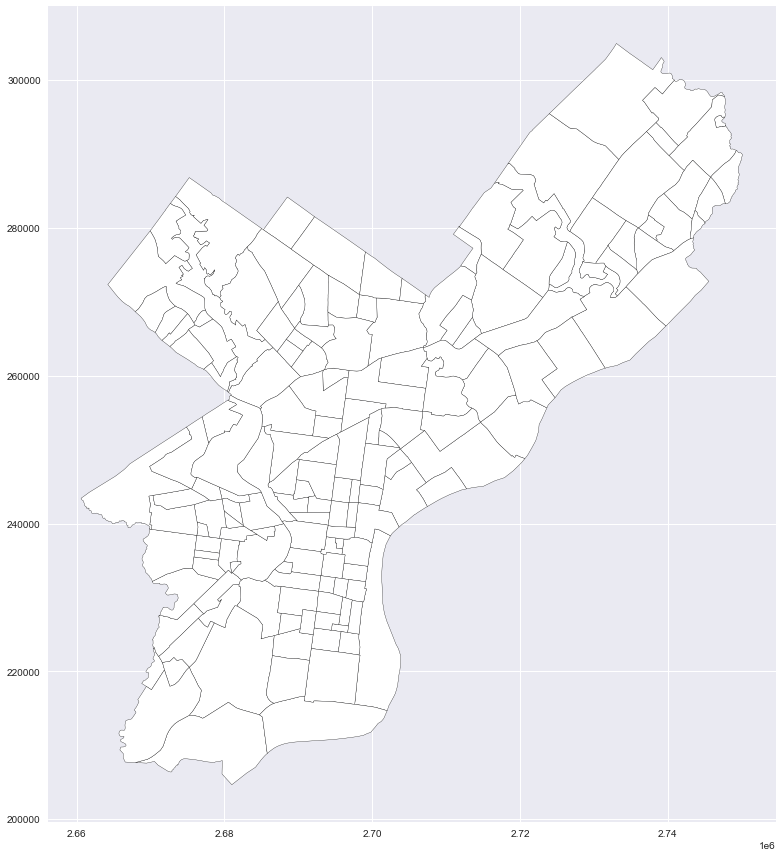

In [7]:
street_map = gpd.read_file("data/geo_shape/Neighborhoods_Philadelphia.shp")
#Download shape file from here. Download all files under folder "Neighborhoods_philadelphia" and keep in the same folder https://github.com/azavea/geo-data
fig,ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.plot(ax = ax,  color = "white", edgecolor='black')


In [8]:
street_map.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."


<AxesSubplot:>

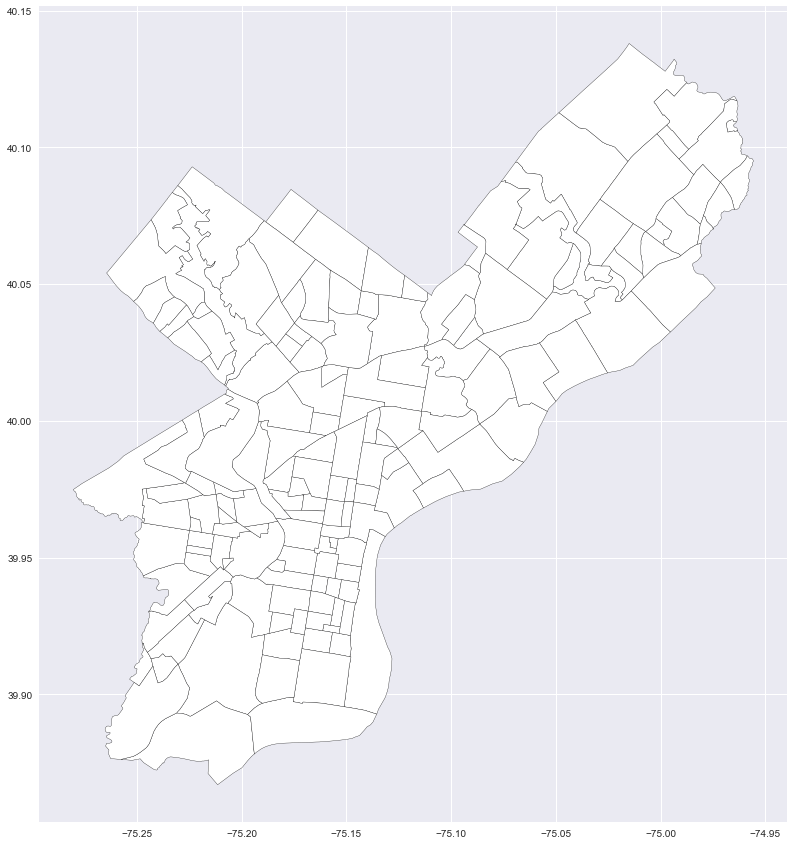

In [9]:
fig,ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).plot(ax = ax, color = "white", edgecolor='black')# converting axis to coordiate with longitude and latitude

<AxesSubplot:>

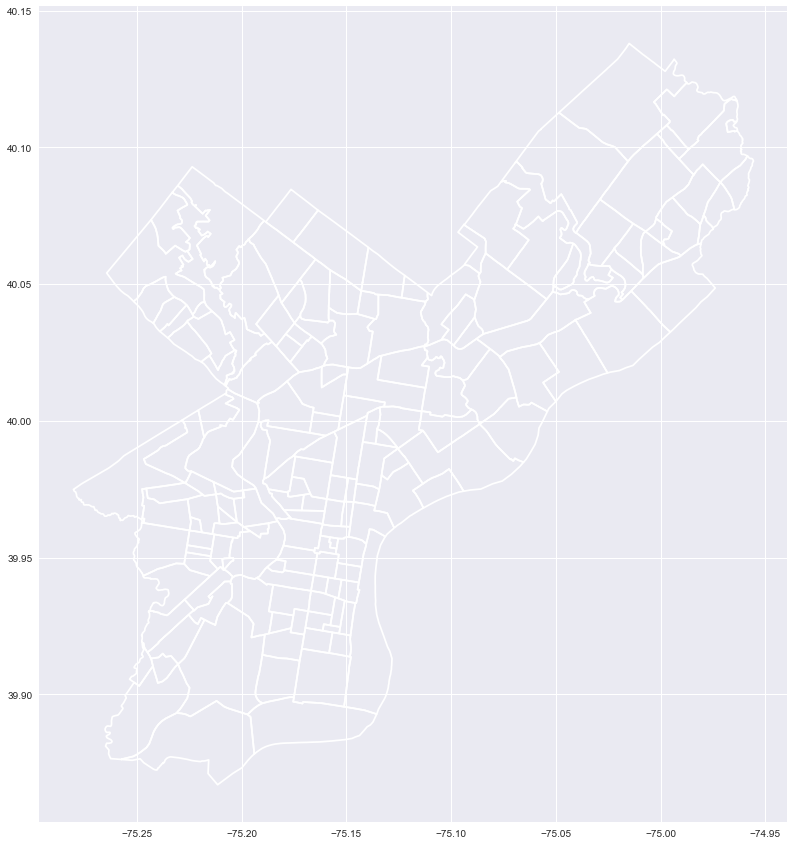

In [24]:
fig,ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).boundary.plot(ax = ax)# plotting only boundary

In [10]:
street_map.to_crs(epsg = 4326).head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-75.06773 40.00540, -75.06765 40.005..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((-75.01560 40.09487, -75.01768 40.092..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((-75.18848 40.07273, -75.18846 40.072..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((-75.21221 40.08604, -75.21210 40.086..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((-75.18478 40.02837, -75.18426 40.027..."


In [11]:
street_map.total_bounds# exact city boundary

array([2660586.2010556 ,  204650.55486186, 2750109.00494927,
        304965.32339202])

In [12]:
street_map.centroid# center coordinate of the sape

0      POINT (2719422.233 253264.287)
1      POINT (2725947.795 288491.804)
2      POINT (2688745.576 280652.166)
3      POINT (2679098.697 279137.188)
4      POINT (2685458.776 259484.374)
                    ...              
153    POINT (2688489.596 218958.968)
154    POINT (2697705.388 227294.296)
155    POINT (2691305.087 226663.440)
156    POINT (2688805.843 226518.573)
157    POINT (2693761.573 226871.685)
Length: 158, dtype: geometry

In [13]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(philly_points["X"], philly_points["Y"])]
geometry[:3]

In [14]:
geo_df = gpd.GeoDataFrame(philly_points,
                            crs = crs,
                            geometry = geometry)

geo_df.head()

,X,Y,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_FLAG,VACANT_RANK,geometry
0,-75.178904,39.934505,1,2041 REED ST,GREATER DELIVERANCE TEMPL,NaN,VAC LAND COMM. < ACRE,885396760.0,498086,2,CMX-2,19146.0,0.67,0.0,Land,0.67,POINT (-75.17890 39.93451)
1,-75.164548,39.988160,2,2233 N UBER ST,CITY OF PHILA,NaN,VAC LAND RES < ACRE,162113701.0,581713,5,RSA-5,19132.0,0.50,0.0,Land,0.50,POINT (-75.16455 39.98816)
2,-75.180480,39.978561,3,1460 N MARSTON ST,PHILADELPHIA HOUSING AUTH,NaN,VAC LAND RES < ACRE,292083110.0,415511,5,RSA-5,19121.0,0.50,0.0,Land,0.50,POINT (-75.18048 39.97856)
3,-75.186579,40.006852,4,3241 SUGDENS ROW,JORDAN MARIA,NaN,VAC LAND RES < ACRE,382209500.0,557317,4,RSA-5,19129.0,1.00,0.0,Land,1.00,POINT (-75.18658 40.00685)
4,-75.238794,39.954902,5,5816 PINE ST,WALSH JAMES,LUBLIN WILLIAM H,ROW 2 STY MASONRY,604178400.0,485528,3,RM-1,19143.0,0.00,1.0,Building,1.00,POINT (-75.23879 39.95490)


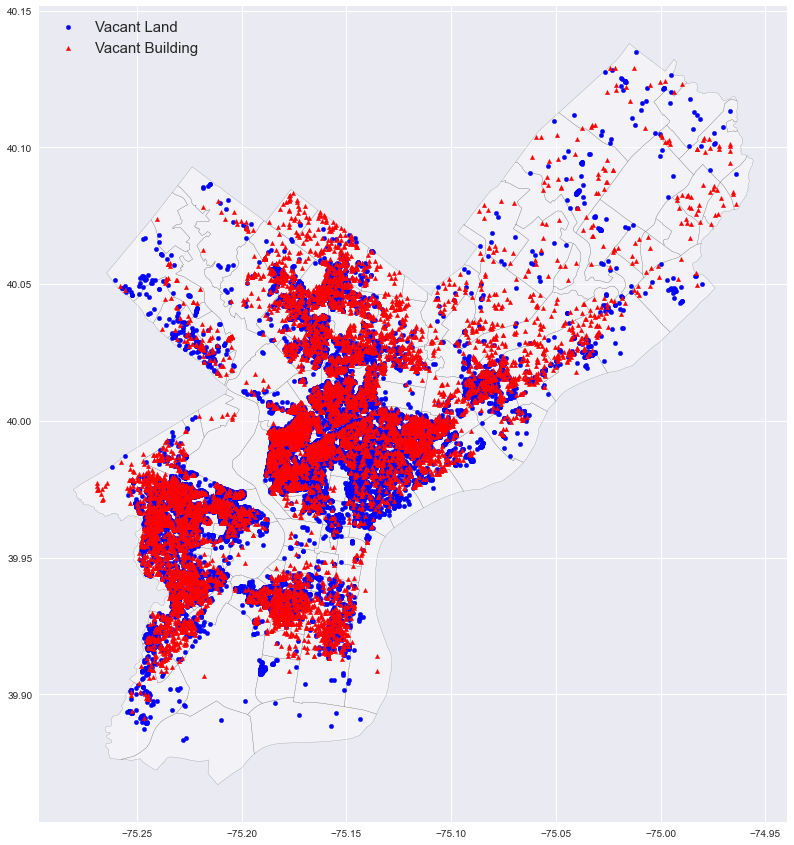

In [15]:
fig, ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4,  color = "white", edgecolor='black')
geo_df[geo_df['VACANT_FLAG'] == 'Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
geo_df[geo_df['VACANT_FLAG'] == 'Building'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Vacant Building")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})
#plt.show()

In [16]:
#download pennsylvania open street map data
#https://download.geofabrik.de/north-america/us/pennsylvania.html
roads_path = "data/osm/gis_osm_roads_free_1.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')

In [17]:
roads_new = roads.to_crs(epsg = 4326)
street_map_new = street_map.to_crs(epsg = 4326)

In [18]:
street_map_new.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((-75.06773 40.00540, -75.06765 40.005..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((-75.01560 40.09487, -75.01768 40.092..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((-75.18848 40.07273, -75.18846 40.072..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((-75.21221 40.08604, -75.21210 40.086..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((-75.18478 40.02837, -75.18426 40.027..."


In [19]:
roads_new.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,368034,5115,tertiary,Seaport Drive,None,F,0,0,F,F,"LINESTRING (-75.38773 39.82798, -75.38600 39.8..."
1,368041,5113,primary,Industrial Highway,US 13;PA 291,B,0,0,F,F,"LINESTRING (-75.35786 39.84750, -75.35676 39.8..."
2,368043,5115,tertiary,Bullens Lane,None,F,56,0,F,F,"LINESTRING (-75.35060 39.86874, -75.35050 39.8..."
3,368044,5113,primary,Chester Road,PA 320,B,64,1,T,F,"LINESTRING (-75.36147 39.87190, -75.36118 39.8..."
4,418185,5113,primary,East 9th Street,US 13 Business,B,56,0,F,F,"LINESTRING (-75.35941 39.85319, -75.35874 39.8..."


In [20]:
#filtering only for philadelphia shape
roads = gpd.sjoin(roads_new, street_map_new, predicate ='intersects')

In [25]:
roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,index_right,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area
235570,12108955,5122,residential,Brunner Street,None,F,0,0,F,F,"LINESTRING (-75.15542 40.01863, -75.15717 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
235571,12108958,5122,residential,Brunner Street,None,F,0,0,F,F,"LINESTRING (-75.15710 40.01773, -75.15856 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
238204,12119360,5122,residential,Gratz Street,None,F,0,0,F,F,"LINESTRING (-75.15635 40.02050, -75.15634 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
239953,12133630,5122,residential,Staub Street,None,B,0,0,F,F,"LINESTRING (-75.15447 40.01708, -75.15510 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06
239955,12133635,5122,residential,Staub Street,None,F,0,0,F,F,"LINESTRING (-75.15458 40.01727, -75.15440 40.0...",61,NICETOWN,Nicetown,Nicetown,11237.318154,6.587596e+06


In [26]:
roads.shape

(72827, 17)

<AxesSubplot:>

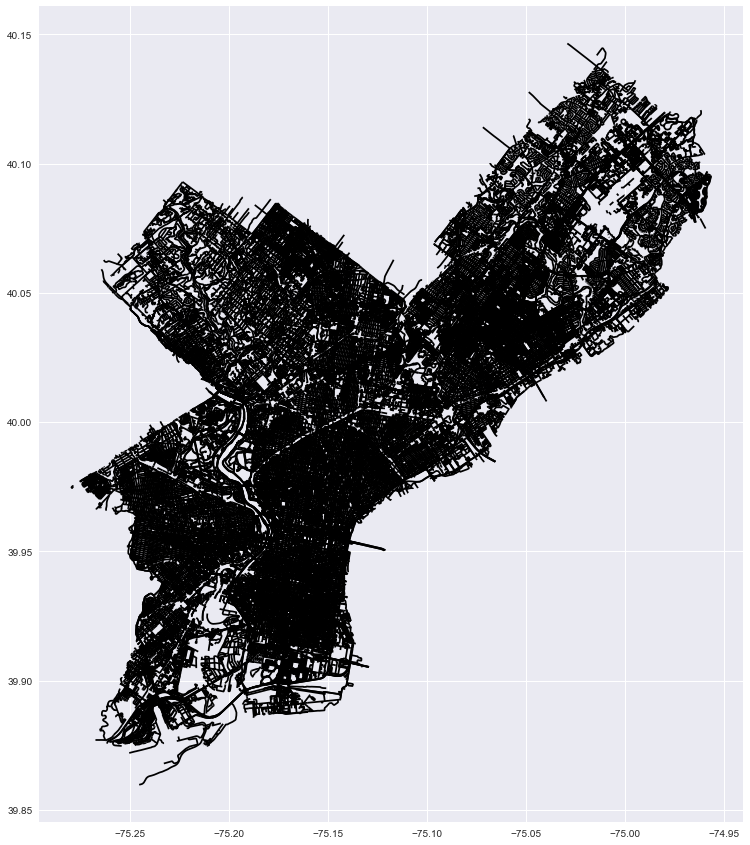

In [30]:
fig, ax = plt.subplots(figsize =(15,15))
roads.plot(ax = ax, edgecolor='black')# plotting all roads

In [21]:
roads.fclass.value_counts()# this shows the type of roads. Most of the roads are  ones thata are used for service, foorway and residential

service           26354
footway           19962
residential       13744
primary            3392
tertiary           2338
secondary          2009
path               1132
trunk               688
motorway_link       649
motorway            625
steps               569
cycleway            351
trunk_link          190
pedestrian          190
unclassified        153
primary_link        150
track               123
secondary_link       87
tertiary_link        62
bridleway            41
track_grade2          5
living_street         5
unknown               4
track_grade5          2
track_grade1          2
Name: fclass, dtype: int64

In [31]:
car_roads = roads[(roads.fclass == 'tertiary') |
                  (roads.fclass == 'tertiary_link') |
                  (roads.fclass == 'secondary') |
                  (roads.fclass == 'secondary_link') |
                  (roads.fclass == 'primary') |
                  (roads.fclass == 'primary_link') |
                  (roads.fclass == 'motorway') |
                  (roads.fclass == 'motorway_linkt')]
                  
car_roads.shape

(8663, 17)

Text(0.5, 1.0, 'Car Roads')

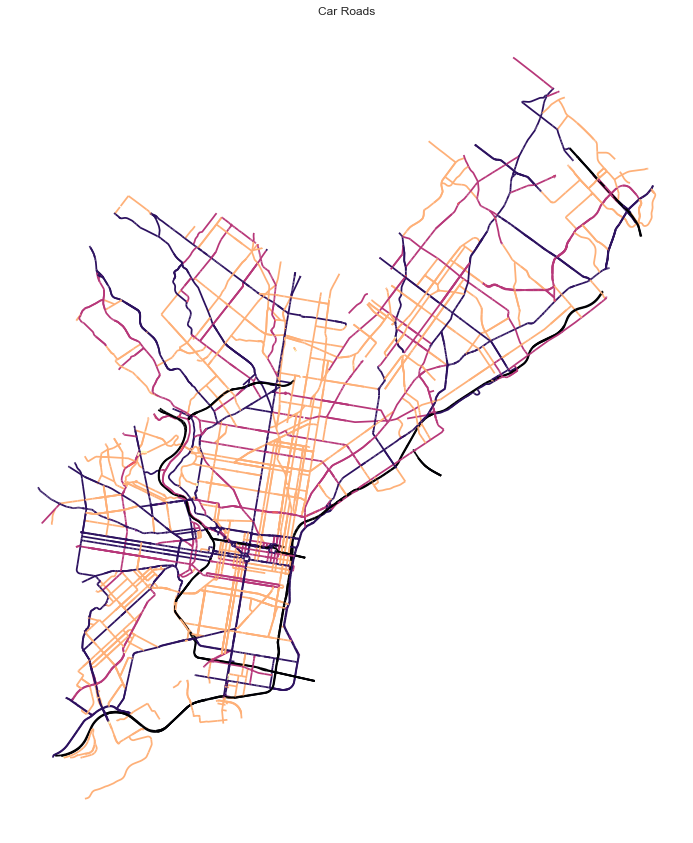

In [36]:
fig, ax = plt.subplots(figsize =(15,15))
car_roads.plot(ax = ax, markersize=0.01, column='fclass',figsize=(5, 5), cmap = 'magma')
plt.axis('off');
plt.title("Car Roads")

Text(0.5, 1.0, 'Main Roads - Philadelphia')

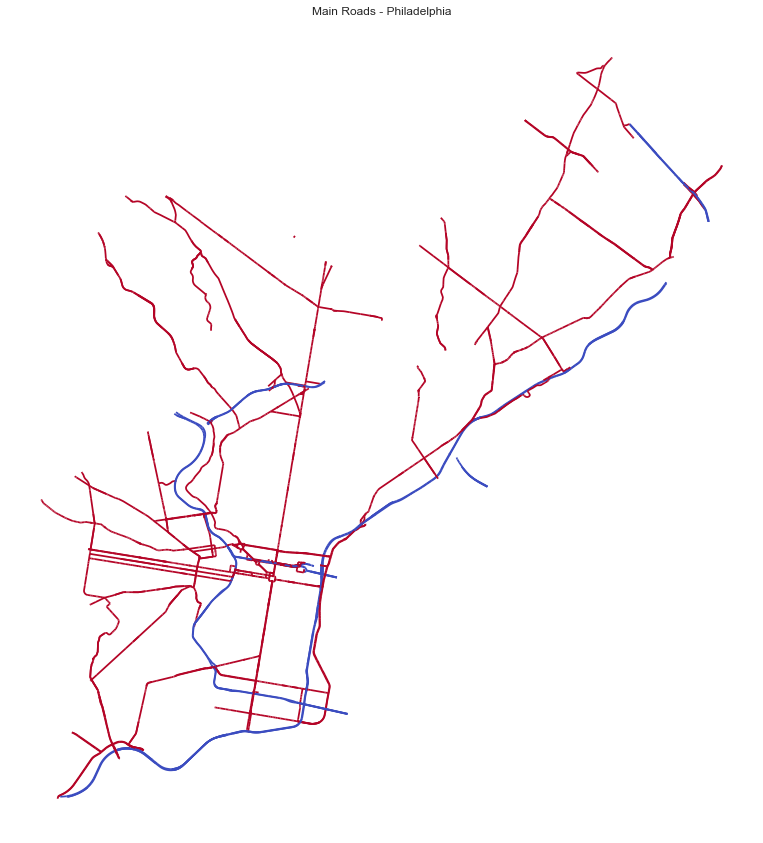

In [40]:
main_roads = car_roads[(car_roads.fclass == 'primary') |
                       (car_roads.fclass == 'motorway')
                      ]

fig, ax = plt.subplots(figsize =(15,15))
main_roads.plot(ax = ax, column='fclass', cmap = 'coolwarm')
plt.axis('off')
plt.title("Main Roads - Philadelphia")

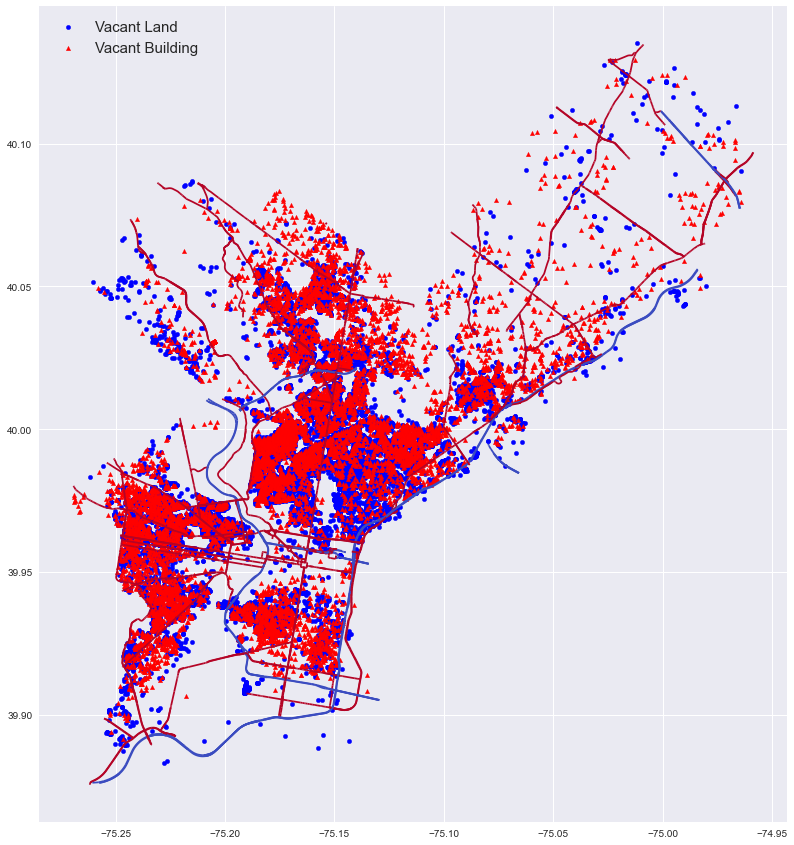

In [41]:
#vacant land and vant building layer on top of main roads in philadelphia
fig, ax = plt.subplots(figsize =(15,15))
main_roads.plot(ax = ax, column='fclass', cmap = 'coolwarm')
geo_df[geo_df['VACANT_FLAG'] == 'Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
geo_df[geo_df['VACANT_FLAG'] == 'Building'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Vacant Building")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})